In [ ]:
import keras
from keras.datasets import cifar10
# les données, mélangées et réparties entre les ensemble train et les ensembles de test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# Afficher le nombre des images de training et les images de test
print(f"Nombre d'images de training: {len(x_train)}")
print(f"Nombre d'images de test: {len(x_test)}")

Nombre d'images de training: 50000
Nombre d'images de test: 10000


In [ ]:
# Les valeurs  spécifiques à CIFAR10
img_rows = 32
img_cols = 32
nb_classes = 10

In [ ]:
# Normalisation 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# stockage des noms des classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

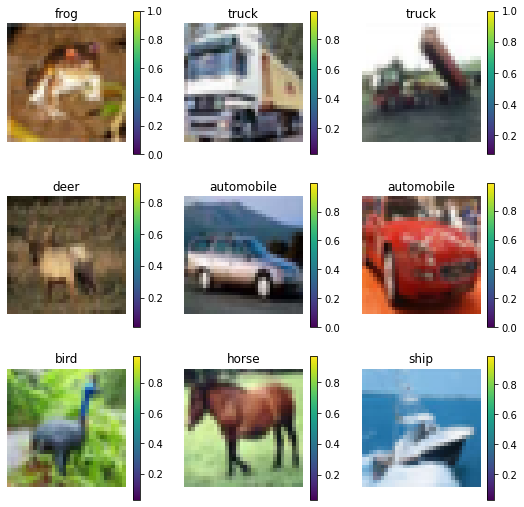

In [ ]:
# Affichage des images
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range (9):
  plt.subplot(3,3, i+1)
  plt.axis('off')
  plt.imshow(x_train[i])
  plt.colorbar()
  plt.title(class_names[int(y_train[i])])
plt.show()

In [ ]:
import numpy as np
from keras.utils import np_utils

# to_categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# parameters
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
CLASS_NUM = 10
norm_size = 28

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.models import load_model

In [ ]:
# définir le model NET
def l_model(width, height, depth, NB_CLASS):
    model = Sequential()
    inputShape = (32, 32, 3)
    # si nous utilisons "channels last", mettez à jour la forme d'entrée
    if K.image_data_format() == "channels_first": 
        inputShape = (32, 32, 3)
    # premier ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # deuxième ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(16, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # premier ensemble de couches FC => RELU                             
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation("relu"))
    # 2 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation("relu"))
    # 3 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))

    # softmax classifieur                                              
    model.add(Dense(NB_CLASS))
    model.add(Activation("softmax"))

    # renvoie l'architecture du réseau construite
    return model

In [ ]:
# affichage des caracteristiques du model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 6)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
activation_43 (Activation)   (None, 12, 12, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 576)              

In [ ]:
model = l_model(width=norm_size, height=norm_size, depth=1, NB_CLASS=CLASS_NUM)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# traning
H = model.fit(x_train, y_train, batch_size=BS, epochs=EPOCHS,validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6844 - accuracy: 0.3738 - val_loss: 1.4674 - val_accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3133 - accuracy: 0.5244 - val_loss: 1.2285 - val_accuracy: 0.5534
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1830 - accuracy: 0.5728 - val_loss: 1.1756 - val_accuracy: 0.5788
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0958 - accuracy: 0.6101 - val_loss: 1.1181 - val_accuracy: 0.6026
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0241 - accuracy: 0.6352 - val_loss: 1.1288 - val_accuracy: 0.5967
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9666 - accuracy: 0.6571 - val_loss: 1.0852 - val_accuracy: 0.6171
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9163 - accuracy: 0.6746 - val_loss: 1.0787 -

Text(0.5, 1.0, 'lrate=0.001')

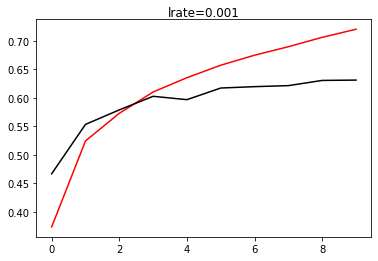

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(H.history['accuracy'], label ='train', color = 'red')
pyplot.plot(H.history['val_accuracy'], label ='test', color = 'black')
pyplot.title('lrate='+str(INIT_LR), pad = -50)

313/313 [==============================] - 4s 12ms/step - loss: 1.0922 - accuracy: 0.6310


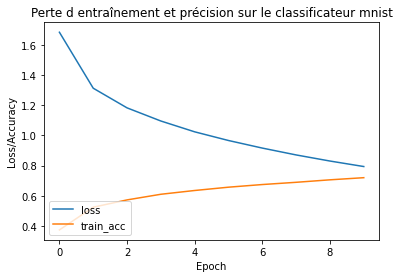

In [ ]:
# le processus d'itération
N = EPOCHS
plt.figure()
plt.plot(np.arange(0,N),H.history['loss'],label='loss')
plt.plot(np.arange(0,N),H.history['accuracy'],label='train_acc')
plt.title('Perte d entraînement et précision sur le classificateur mnist')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
#  Calcul de la perte et de la précision
# train
tr_loss, tr_accurary = model.evaluate(x_train, y_train)
# test
te_loss, te_accurary = model.evaluate(x_test, y_test)